# Project 2 - Ames Housing Data and Kaggle Challenge

**1) Introduction**

This notebook is going to be focused on creating a regression model based on the Ames Housing Dataset in order to predict house prices for interested buyers and sellers. Since a house value is more than its square footage and location, we would like to find out all features that add value to a house.

Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.
There are 2930 observations and 82 variables:
- 23 nominal
- 23 ordinal
- 14 discrete
- 20 continuous
- 2 identifier

The variables can roughly fall under each of below categories:
- Location
- Area measurements
- Lot / Land
- Age
- Appearance
- Roof
- Garage
- Kitchen
- Rooms / Bathrooms
- Utilities
- External (Deck, pool, porch etc.)

**2) Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

**3) Read in the data**

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

We are provided with 2051 observations with actual target value to train our model for the best accurate predictions.

In [5]:
test.shape

(879, 80)

We are provided with 879 observation without actual target value to test our model's performance.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

Dataset contains 37 numerical and 42 categorical variables.

In [7]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


**4) Analyzing the Target Variable**

In [8]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

Average price is $181,469.

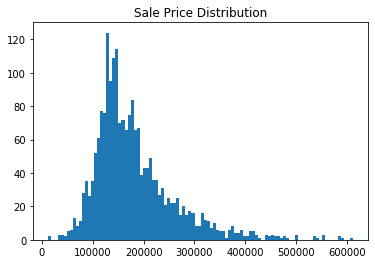

In [9]:
# plot histogram of SalePrice
plt.hist(train['SalePrice'], bins=100)
plt.title('Sale Price Distribution');

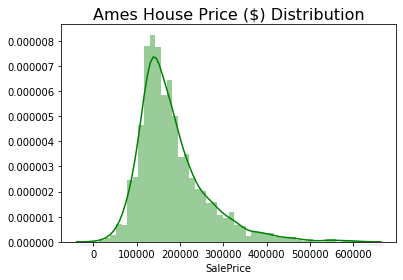

In [10]:
sns.distplot(train['SalePrice'], color='green').set_title('Ames House Price ($) Distribution', fontsize=16);

It's almost a normal distribution with a slight positive skewness due to outliers. It shows that very small number of houses have high pricess. As we want our target variable as normal as possible, it may be a good idea to apply log transformation which reduces the impact of positive skewness.

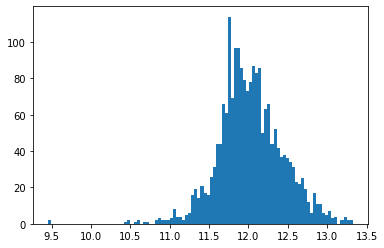

In [11]:
plt.hist(np.log(train['SalePrice']), bins=100);

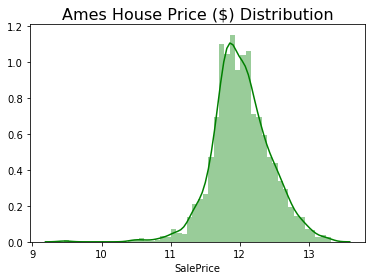

In [12]:
sns.distplot(np.log(train['SalePrice']), color='green').set_title('Ames House Price ($) Distribution', fontsize=16);

It looks more normal now. I will apply permanent log transformation to my target when evaluating my model's performance.

In [13]:
# train['SalePrice'] = np.log(train['SalePrice'])

**5) Inspecting Missing Values**

In [14]:
# define a function that returns a dataframe with missing values percentage
def find_missing(data):
    all_na_percent = data.isnull().mean()
    na_percent = all_na_percent[all_na_percent > 0].sort_values(ascending=False)
    na_data = pd.DataFrame({'Missing Percentage' : na_percent})
    return na_data

**- Train Data**

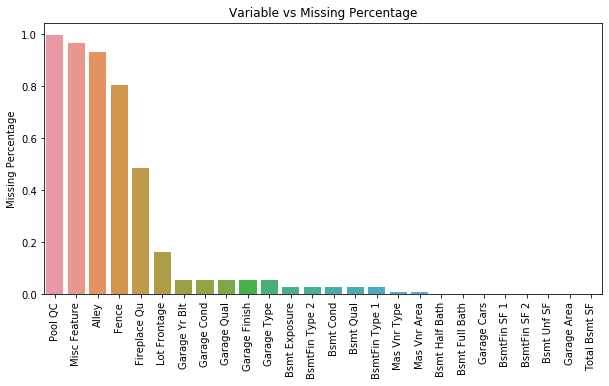

In [15]:
# visualize missingness
na_train = find_missing(train)

plt.subplots(figsize=(10, 5))
sns.barplot(x=na_train.index, y=na_train['Missing Percentage'])
plt.xticks(rotation='90')
plt.title('Variable vs Missing Percentage', fontsize=12);

In [16]:
# define a function that fills missing values with None
def fill_none(data, cols):
    for col in cols:
        data[col] = data[col].fillna('None')

# create a list of variables where NA means None per DataDocumentation.txt
none_cols_train = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Cond', 'Garage Qual', 
             'Garage Finish', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Qual',
             'BsmtFin Type 1', 'Mas Vnr Type']

# fill NA values with None
fill_none(train, none_cols_train)

In [17]:
# define a function that fills missing values with 0
def fill_zero(data, cols):
    for col in cols:
        data[col] = data[col].fillna(0)

# create a list of variables where NA means 0
zero_cols_train = ['Garage Area', 'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF',
             'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area']

# fill NA values with 0
fill_zero(train, zero_cols_train)

I believe the houses in same neighborhood should have similar linear feet connected to the property. Thus, I will fill nulls with median value of the neighborhood.

In [18]:
# fill NA Lot Frontage values with median of its neighborhood
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.median()))

In [19]:
# fill overall median value for remaining NAs
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].median())
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].median())

In [20]:
# check if any NAs left
train.isnull().mean().sum()

0.0

**- Test Data**

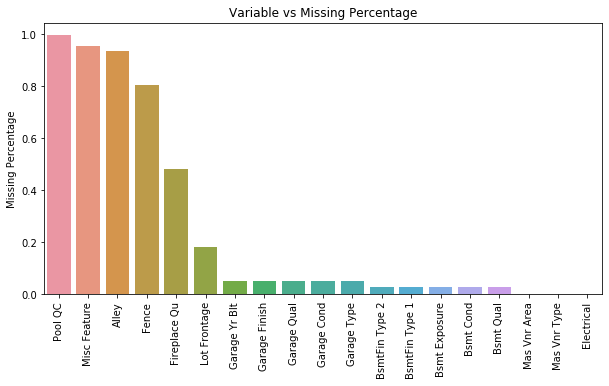

In [21]:
# visualize missingness
na_test = find_missing(test)

plt.subplots(figsize=(10, 5))
sns.barplot(x=na_test.index, y=na_test['Missing Percentage'])
plt.xticks(rotation='90')
plt.title('Variable vs Missing Percentage', fontsize=12);

In [22]:
# create a list of variables where NA means None per DataDocumentation.txt
none_cols_test = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Garage Cond', 'Garage Qual', 
             'Garage Finish', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Qual',
             'BsmtFin Type 1', 'Mas Vnr Type']

# fill NA values with None
fill_none(test, none_cols_test)

In [23]:
# create a list of variables where NA means 0
zero_cols_test = ['Mas Vnr Area']

# fill NA values with 0
fill_zero(test, zero_cols_test)

In [24]:
# fill NA Lot Frontage values with median of its neighborhood
test['Lot Frontage'] = test.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.median()))
# fill NA Garage Yr Blt with median values
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(test['Garage Yr Blt'].median())

In [25]:
# define a function that fills missing values with most common value
def fill_mode(data, cols):
    for col in cols:
        data[col] = data[col].fillna(data[col].mode()[0])

# create a list of variables where NA should be replaced with Mode
mode_cols_test = ['Electrical']

# fill NA values with None
fill_mode(test, mode_cols_test)

In [26]:
# check if any NAs left
test.isnull().mean().sum()

0.0

There is no other NAs left in test dataset.

**6) Feature Analysis / Engineering**

There are two types of features in AMES housing data: numerical and categorical. Numerical data is either continuous or discrete; and categorical data is either nominal or ordinal.

**A) Numerical Variables (Discrete and Continuous)**

Our main goal here is detecting the variables that are most correlated with SalePrice while being independent from each other. We can easily do the math to find the most correlated variables thanks to Python but we need to choose them wisely as redundancy is our enemy. --- said "Master of the Obvious"

In [27]:
train.corr()['SalePrice'].shape
# There are 37 continuous features that can be correlated

(39,)

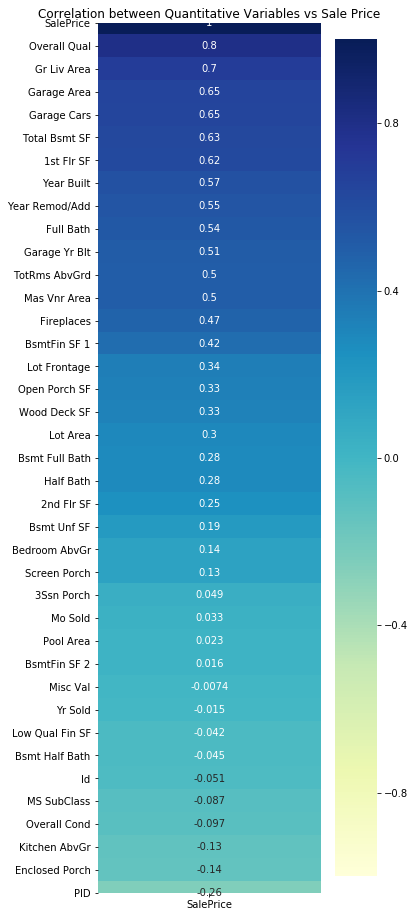

In [28]:
# heatmap for SalePrice correlation with all numerical variables (continuous and discrete)
plt.figure(figsize=(5,16))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='YlGnBu', vmin=-1, vmax=1).set_title('Correlation between Quantitative Variables vs Sale Price');

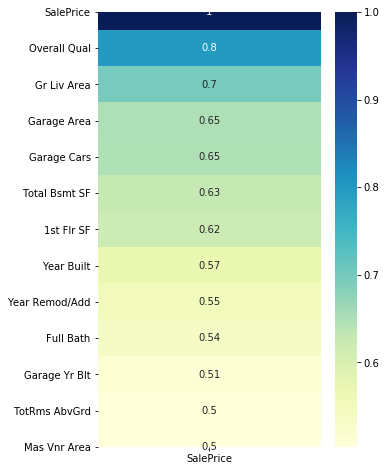

In [29]:
plt.figure(figsize=(5,8))
sns.heatmap(train.corr()[['SalePrice']][train.corr()['SalePrice'] >= .50].sort_values(by='SalePrice',ascending=False), annot=True, cmap='YlGnBu');

I am interested in the most blue-ish variables for further analysis. I will group them together to narrow down my data cleaning process.

In [30]:
# The columns that have a correlation of 50% and over
interesting_cols = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 
                    '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 
                    'TotRms AbvGrd']


Some of the column names are self explanotary while I have no ide what some of them are.
Let's check the "DataDocumentation.txt":

1) **Overall Qual:** Rates the overall material and finish of the house (1-10) --- DISCRETE  
2) **Gr Liv Area:** Above grade (ground) living area square feet --- CONTINUOUS  
3) **Garage Area:** Size of garage in square feet --- CONTINUOUS  
4) **Garage Cars:** Size of garage in car capacity --- DISCRETE  
5) **Total Bsmt SF:** Total square feet of basement area --- CONTINUOUS  
6) **1st Flr SF:** First Floor square feet --- CONTINUOUS  
7) **Year Built:** Original construction date --- DISCRETE  
8) **Year Remod/Add:** Remodel date (same as construction date if no remodeling or additions) --- DISCRETE  
9) **Full Bath:** Full bathrooms above grade --- DISCRETE  
10) **Garage Yr Blt:** Year garage was built --- DISCRETE  
11) **Mas Vnr Area:** Masonry veneer area in square feet --- CONTINUOUS  
12) **TotRms AbvGrd:** Total rooms above grade (does not include bathrooms)  --- DISCRETE  
13) **Fireplaces:** Number of fireplaces --- DISCRETE  
14) **BsmtFin SF 1:** Type 1 finished square feet --- CONTINUOUS

In [31]:
train['Overall Qual'].value_counts(dropna=False)
# The data is complete with zero null values

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

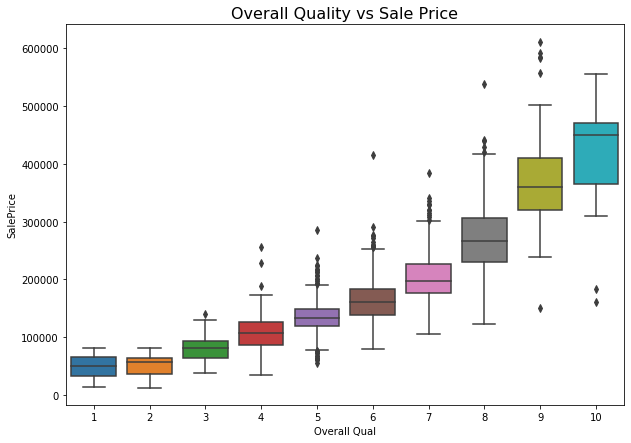

In [32]:
# Overall Quality vs Sale Price
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x=train['Overall Qual'], y=train['SalePrice']).set_title('Overall Quality vs Sale Price', fontsize=16);

Obviously price increases for higher quality. --- said my grandma

In [33]:
train['Gr Liv Area'].isnull().sum()
# The data is complete with zero null values

0

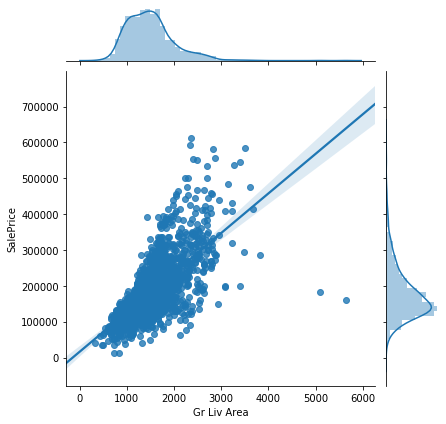

In [34]:
# Ground Living Area vs Sale Price
sns.jointplot(x=train['Gr Liv Area'], y=train['SalePrice'], kind='reg');

The relation looks linear but the two detached outliers influence the slope. It's unlikely that more than 5000 sq ft house would be way cheaper than the houses half the size no matter what. They should be removed.

In [35]:
# drop outliers
train.drop(train.index[(train['Gr Liv Area'] > 5000) & (train['SalePrice'] < 300000)], inplace=True)

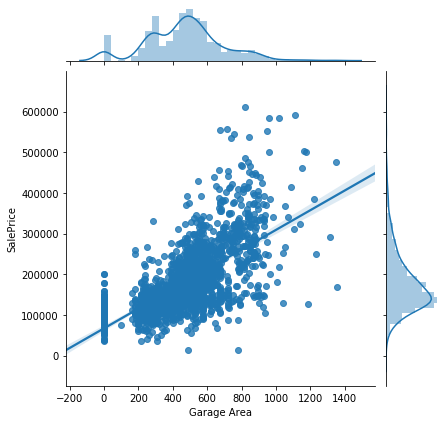

In [36]:
# Garage Area vs Sale Price
sns.jointplot(x=train['Garage Area'], y=train['SalePrice'], kind='reg');

Not bad. There are some outliers but we can forgive them as they are not extremely far away from the slope.

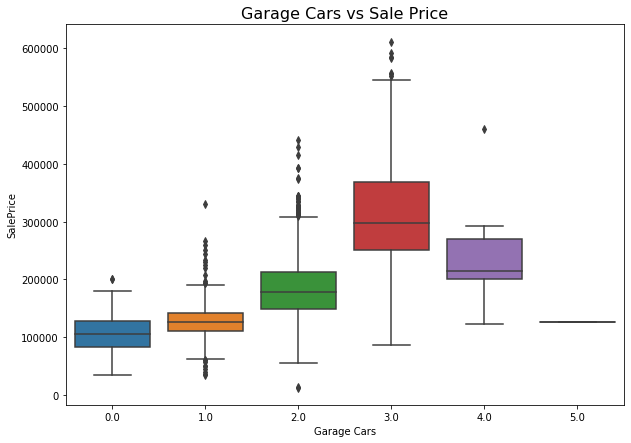

In [37]:
# Garage Cars vs Sale Price
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x=train['Garage Cars'], y=train['SalePrice']).set_title('Garage Cars vs Sale Price', fontsize=16);

In [38]:
train[train['Garage Cars'] > 3]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
194,670,535402330,90,RL,91.0,11643,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,8,2009,WD,200000
289,1590,923202015,90,RM,78.0,7060,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,11,2008,WD,206300
332,1060,528118090,60,RL,96.0,12539,Pave,None,Reg,Lvl,...,192,0,None,None,None,0,6,2008,WD,460000
337,2283,923205025,190,RL,74.0,32463,Pave,None,Reg,Low,...,0,0,None,None,None,0,3,2007,WD,168000
554,1669,527404140,20,RL,70.0,8294,Pave,None,Reg,Lvl,...,0,0,None,GdWo,None,0,6,2007,WD,123000
613,247,906204230,60,RL,87.0,12361,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,5,2010,WD,218000
925,747,903236040,30,RM,50.0,8635,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,8,2009,WD,126500
1016,2905,923202025,90,RM,78.0,7020,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,11,2006,WD,215000
1166,2750,906225180,90,RL,73.0,9069,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2006,WD,224500
1293,1028,527357180,60,RL,80.0,12511,Pave,None,IR1,Lvl,...,208,0,None,MnPrv,None,0,12,2008,WD,292500


In [39]:
train['Garage Cars'].corr(train['Garage Area'])

0.897310248028498

The correlation looks good but there is something off about 4+ cars garages. Removing outliers might be detrimental at this point, so I will take out Garage Cars from features and keep Garage Area instead. They are highly dependent with 89.7% correlation anyways.

In [40]:
# remove Garage Cars from interesting columns list
interesting_cols.remove('Garage Cars')

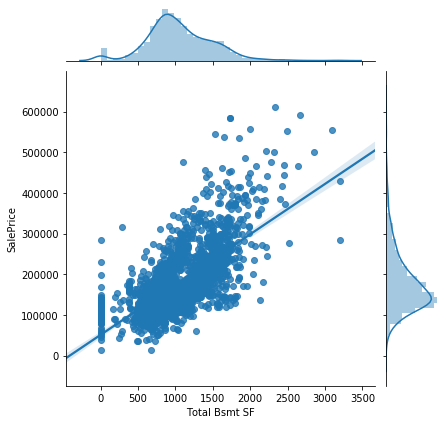

In [41]:
# Basement Area vs Sale Price
sns.jointplot(x=train['Total Bsmt SF'], y=train['SalePrice'], kind='reg');

In [42]:
train['Gr Liv Area'].corr(train['Total Bsmt SF'])

0.41019674078588625

The slope looks fine. Also, there is less dependency between Ground Living Area and Basement area than I expected. I've never lived in a house with basement so this is a new insight for me. I will keep this variable as is.

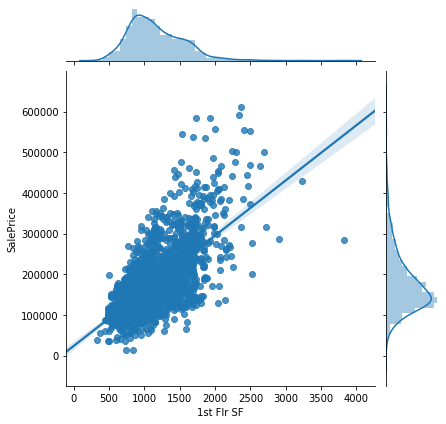

In [43]:
# First Floor Area vs Sale Price
sns.jointplot(x=train['1st Flr SF'], y=train['SalePrice'], kind='reg');

In [44]:
train['Gr Liv Area'].corr(train['1st Flr SF'])

0.5302793560912964

The correlation looks good but what is not good is such a high dependency between Gr Liv Area and 1st Flr SF. This variable might be redundant but I will forgive it for now.

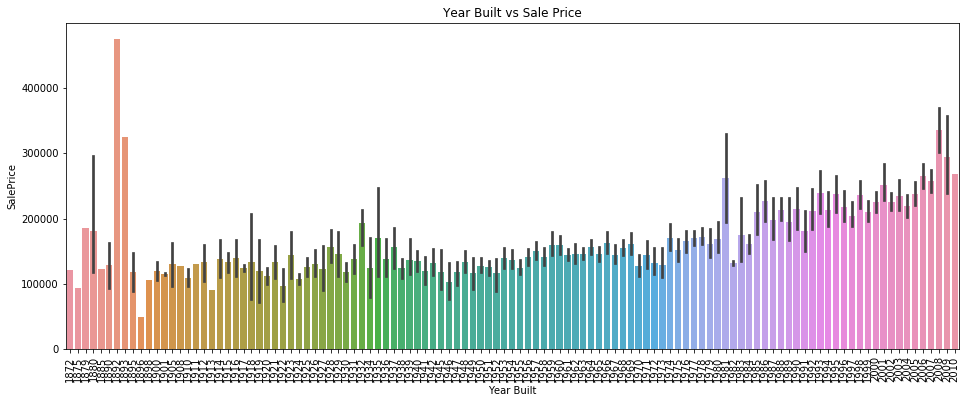

In [45]:
# Year Built vs Sale Price
plt.subplots(figsize=(16, 6))
sns.barplot(x=train['Year Built'], y=train['SalePrice']).set_title('Year Built vs Sale Price')
plt.xticks(rotation=90);

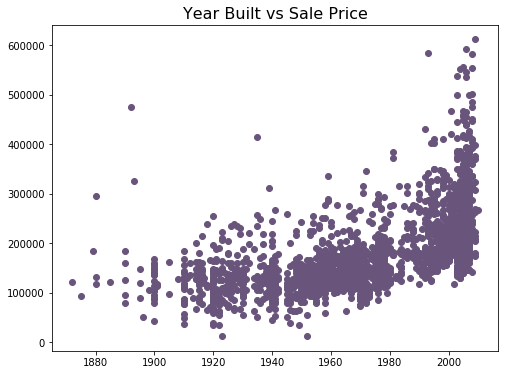

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(train['Year Built'], train['SalePrice'], color = '#69547C')
plt.title('Year Built vs Sale Price', fontsize=16);

According to the scatterplot, new houses built after 2000 have higher price. Modern constructions are more energy-efficent and built based on most recent municipal codes. This might be the reason as well as the minimum presence of poor condition and damages that reduces house value.

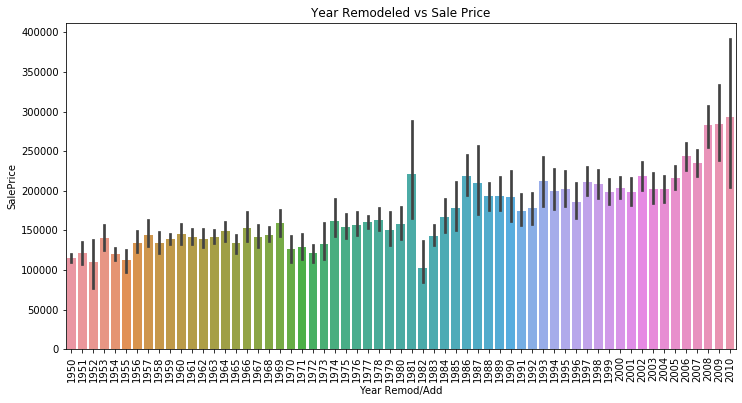

In [47]:
# Year Remodeled vs Sale Price
plt.subplots(figsize=(12, 6))
sns.barplot(x=train['Year Remod/Add'], y=train['SalePrice']).set_title('Year Remodeled vs Sale Price')
plt.xticks(rotation=90);

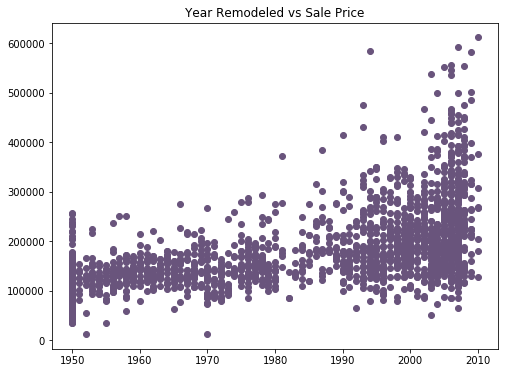

In [48]:
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(train['Year Remod/Add'], train['SalePrice'], color = '#69547C')
plt.title('Year Remodeled vs Sale Price');

In [49]:
train['Year Remod/Add'].corr(train['Year Built'])

0.6286132076811852

Year Built and Year Remodeled looks dependent as expected. I would like to keep Year Built only since it has a better relationship with price.

In [50]:
# remove Year Remodeled from interesting columns list
interesting_cols.remove('Year Remod/Add')

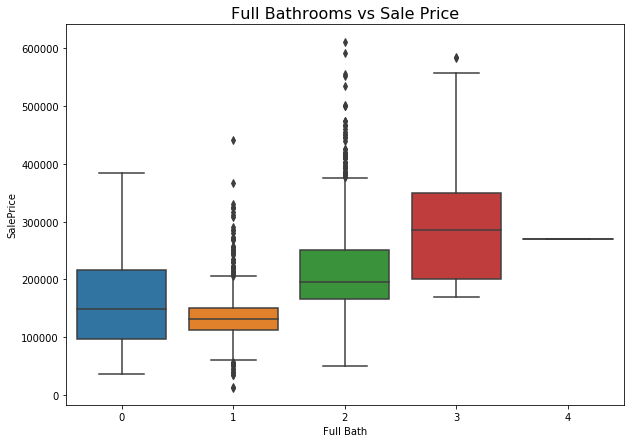

In [51]:
# Full Bathrooms vs Sale Price
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x=train['Full Bath'], y=train['SalePrice']).set_title('Full Bathrooms vs Sale Price', fontsize=16);

More full bathrooms bring more value, makes sense. I am curious who would pay for a house with no full bathrooms though.

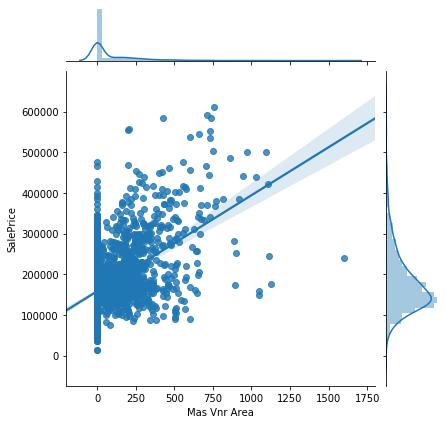

In [52]:
# Masonry Veneer Area vs Sale Price
sns.jointplot(x=train['Mas Vnr Area'], y=train['SalePrice'], kind='reg');

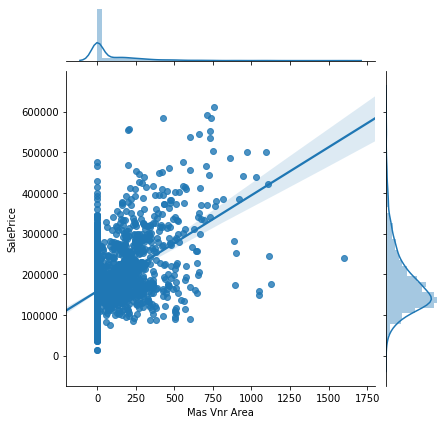

In [53]:
# Masonry Veneer Area vs Sale Price
sns.jointplot(x=train['Mas Vnr Area'], y=train['SalePrice'], kind='reg');

I love brick constructions and happy to see that a good number of buyers in Iowa think alike.

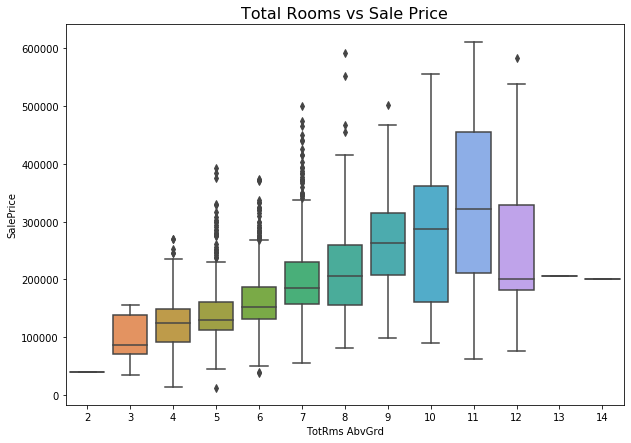

In [54]:
# Total Rooms vs Sale Price
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x=train['TotRms AbvGrd'], y=train['SalePrice']).set_title('Total Rooms vs Sale Price', fontsize=16);

Is there a special discount for the houses that have more than 11 rooms in Iowa? There may be number of other reasons of course, so I will leave it alone but keep in mind to revisit later.

Most columns I am interested are related to physical space of the house. Thus, I hypothesize that the variables that deal with the size have the highest impact on price.

**B) Categorical Variables (Nominal and Ordinal)**

Nominals

I will first look at some nominal variables as the only way to incorporate them in my model is transforming to dummy variables. The type of the categorical variables are already stated in data documentation, so I don't need to put much thought on separating them.

In [55]:
# create a list of nominal categorical variables
nom_cats = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 
            'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
            'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
            'Garage Type', 'Misc Feature', 'Sale Type']

In [56]:
# look at the unique values to see if they are unique indeed
for col in nom_cats:
    print(train[col].unique())

[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
['Pave' 'Grvl']
['None' 'Pave' 'Grvl']
['Lvl' 'HLS' 'Bnk' 'Low']
['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran']
['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng'
 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc'
 'AsphShn']
['P

The categorical values seem clean as there is no repetition due to typos or intentional detection testing.

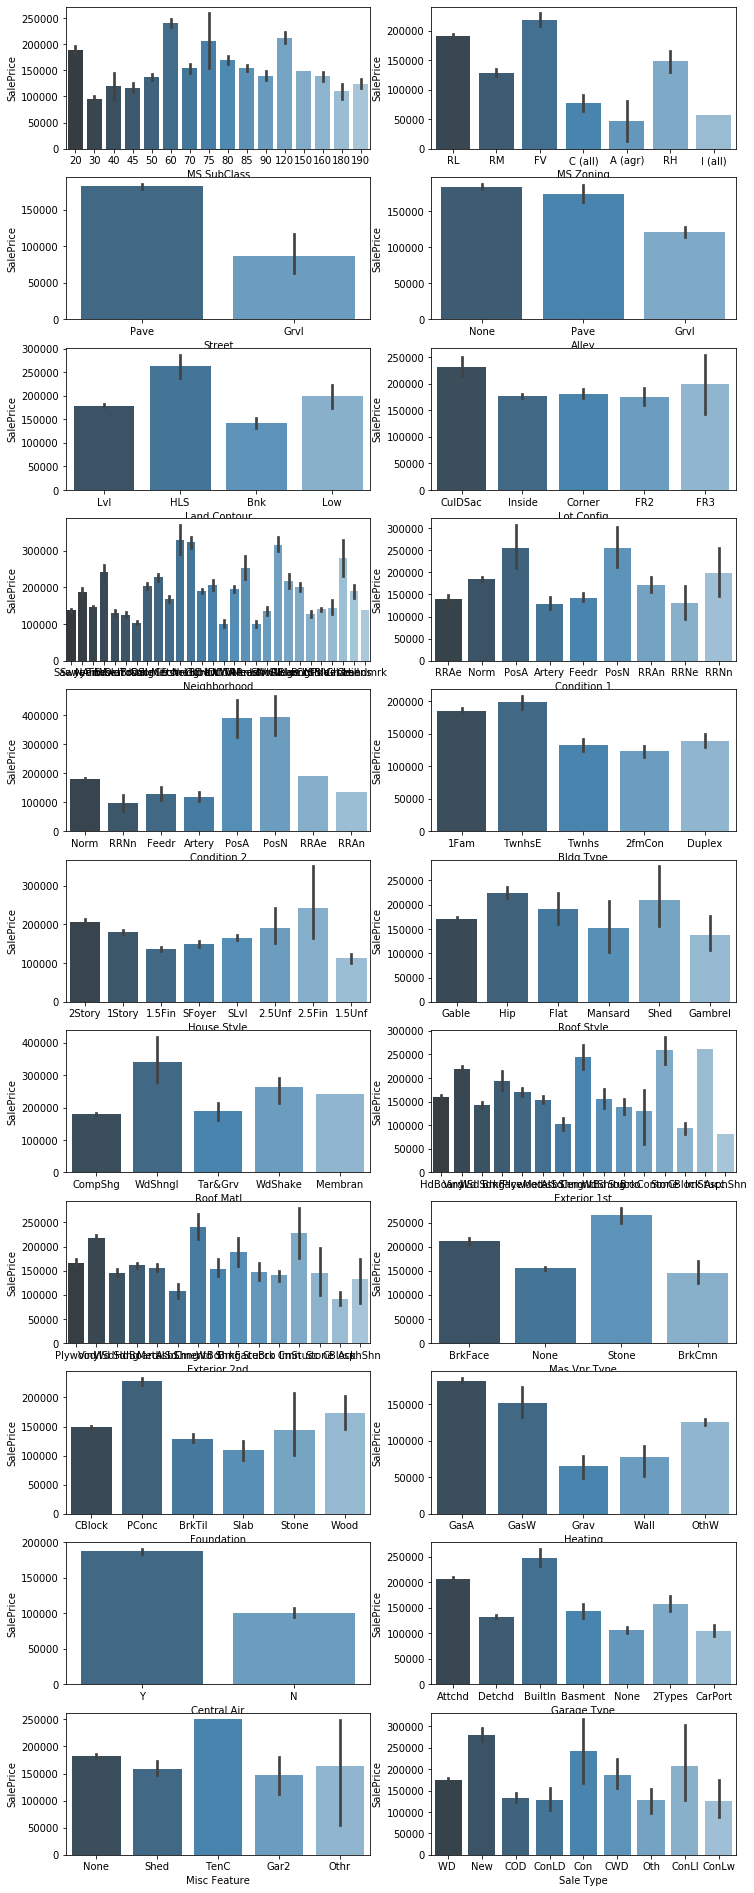

In [57]:
# define a custom function to subplot Seaborn barplots
def subplot_bars(dataframe, features, target):
    # reserve sufficient number of rows
    nrows = int(np.ceil(len(features)/2))
    # specify a large figure
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,34))
    # plt.title('Correlation between Nominal Categories and Sale Price')
    # turn axes into vector for iteration
    ax = ax.ravel()
    # loop through index and columns in features list
    for i, col in enumerate(features):
        # create barplots for each feature vs target
        sns.barplot(x = dataframe[col], y = dataframe[target], palette='Blues_d', ax=ax[i])

# plot the relationship between nominal categories vs Sale Price
subplot_bars(train, nom_cats, 'SalePrice')

The bar plots show that some categorical features affect the price more than the others. For example, MS Zoning, Street, Neighborhood, Condition 2, Exterior 1st, Central Air, and Heating are good candidates to be predictors for price. However, Lot Config, Building Type, Roof Style, Roof Type are not very important for home buyers. The location related features have the most affect as the location is a major implication for the future value of a house. Also, you can remodel a house and change certain features related to style to add value but you cannot relocate a house. Furthermore, I would like to exclude the variables that have too many None values since it implies that it's not an essential feature.

In [58]:
# dummy variables in action
train = pd.get_dummies(train,
                          columns=['MS Zoning', 'Street', 'Neighborhood', 'Condition 2', 
                                   'Exterior 1st', 'Central Air', 'Heating'], drop_first=True)

In [59]:
# repeat dummies for test
test = pd.get_dummies(test,
                          columns=['MS Zoning', 'Street', 'Neighborhood', 'Condition 2', 
                                   'Exterior 1st', 'Central Air', 'Heating'], drop_first=True)

In [60]:
pd.set_option('display.max_columns', 1000)

In [61]:
train.shape

(2049, 134)

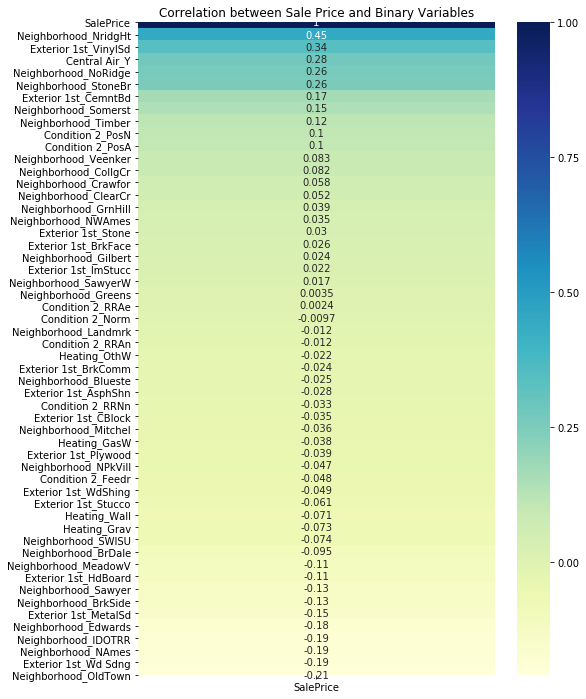

In [62]:
# heatmap for Sale Price vs new binary variables correlation
fig, ax = plt.subplots(figsize = (8, 12))
sns.heatmap(train[train.columns[81:134]].join(train.SalePrice).corr()[['SalePrice']].sort_values('SalePrice', ascending=False), 
            annot=True, cmap='YlGnBu', ax=ax).set_title('Correlation between Sale Price and Binary Variables');

The correlation of the newly dummied variables are not very strong. I will choose few more interesting features and check the correlation. 

In [63]:
train = pd.get_dummies(train,
                          columns=['Foundation', 'Garage Type', 'Exterior 2nd', 
                                   'Sale Type', 'Paved Drive', 'Electrical' ], drop_first=True)

In [64]:
test = pd.get_dummies(test,
                          columns=['Foundation', 'Garage Type', 'Exterior 2nd', 
                                   'Sale Type', 'Paved Drive', 'Electrical' ], drop_first=True)

In [65]:
train.shape

(2049, 167)

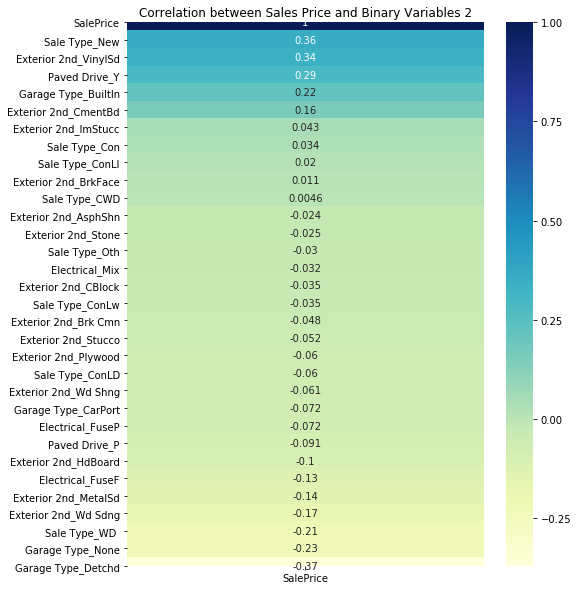

In [66]:
# heatmap for Sale Price vs newest binary variables correlation
fig, ax = plt.subplots(figsize = (8, 10))
sns.heatmap(train[train.columns[135:166]].join(train.SalePrice).corr()[['SalePrice']].sort_values('SalePrice', ascending=False), 
            annot=True, cmap='YlGnBu', ax=ax).set_title('Correlation between Sales Price and Binary Variables 2');

In [67]:
# extend interesting columns list with new findings
interesting_cols.extend(['Central Air_Y', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 
                         'Neighborhood_StoneBr', 'Neighborhood_OldTown', 'Exterior 1st_VinylSd', 'Paved Drive_Y',
                         'Sale Type_New', 'Electrical_SBrkr', 'Garage Type_BuiltIn', 'Exterior 2nd_CmentBd', 
                         'Garage Type_Detchd', 'Garage Type_None', 'Sale Type_WD ', 'Exterior 2nd_Wd Sdng'])

**Ordinals**

Let's move on with the ordinal categorical variables.

In [68]:
ord_cats = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Cond', 'Bsmt Qual', 
            'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Kitchen Qual', 'Functional', 
            'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence']

In [69]:
# look at the unique values to see if they are unique indeed
for col in ord_cats:
    print(train[col].unique())

['IR1' 'Reg' 'IR2' 'IR3']
['AllPub' 'NoSeWa' 'NoSewr']
['Gtl' 'Sev' 'Mod']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Gd' 'None' 'Fa' 'Po' 'Ex']
['TA' 'Gd' 'Fa' 'None' 'Ex' 'Po']
['No' 'Gd' 'Av' 'None' 'Mn']
['GLQ' 'Unf' 'ALQ' 'Rec' 'None' 'BLQ' 'LwQ']
['Unf' 'Rec' 'None' 'BLQ' 'GLQ' 'LwQ' 'ALQ']
['Gd' 'TA' 'Fa' 'Ex']
['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
['None' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
['RFn' 'Unf' 'Fin' 'None']
['TA' 'Fa' 'None' 'Gd' 'Ex' 'Po']
['TA' 'Fa' 'None' 'Po' 'Gd' 'Ex']
['None' 'Fa' 'Gd' 'Ex' 'TA']
['None' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


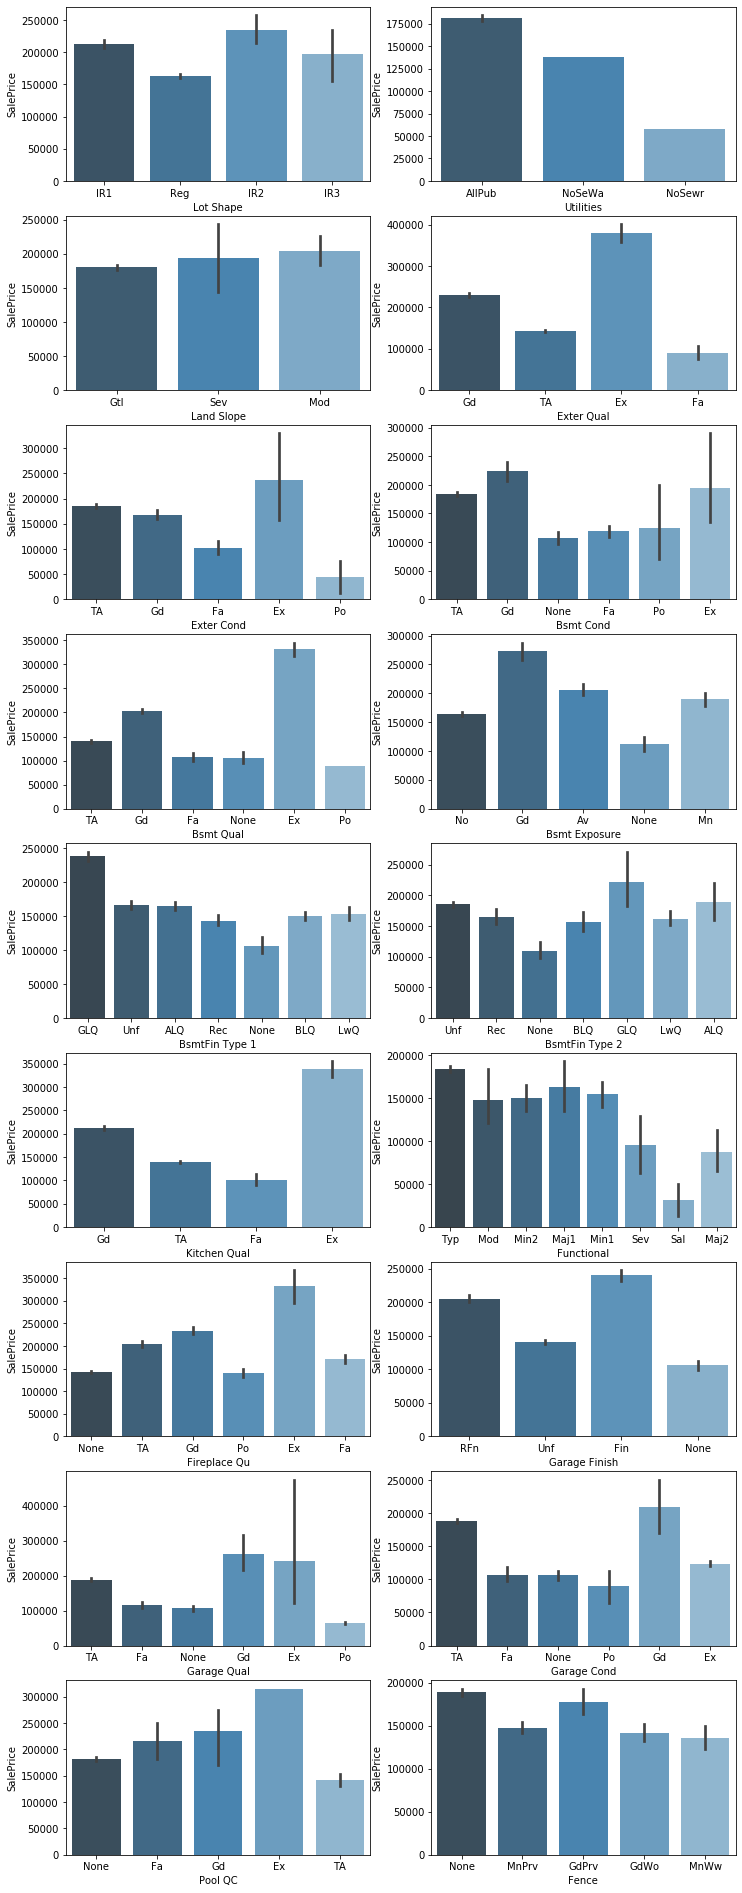

In [70]:
# plot the relationship between ordinal categories vs Sale Price

# custom function in action!
subplot_bars(train, ord_cats, 'SalePrice')

The bar plots show that some nominal features affect the price more than the others. For example, Utilities, External Quality, Kitchen Quality, Functional, Fireplace Quality, Garage Condition, and Basement Quality are good candidates to be predictors for price. However, Lot Shape, Land Slope, Fence are not very important for home buyers. People pay more for better quality as buying a house is a lifetime decision and standards must be set high.

In [71]:
# create dictionaries to map ordinal categories with integer values

score_1 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
score_2 = {'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'None':1}
score_3 = {'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, 'None':1}
score_4 = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ALO':1}
score_5 = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}
score_6 = {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1} # Lot Shape
score_7 = {'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1} # Land Contour


In [72]:
# map dictionaries to corresponding ordinal categories

train['Utilities'] = train['Utilities'].replace(score_4)
train['Exter Qual'] = train['Exter Qual'].replace(score_1)
train['Exter Cond'] = train['Exter Cond'].replace(score_1)
train['Kitchen Qual'] = train['Kitchen Qual'].replace(score_1)
train['Functional'] = train['Functional'].replace(score_5)
train['Fireplace Qu'] = train['Fireplace Qu'].replace(score_2)
train['Garage Cond'] = train['Garage Cond'].replace(score_2)
train['Bsmt Qual'] = train['Bsmt Qual'].replace(score_2)
train['Bsmt Cond'] = train['Bsmt Cond'].replace(score_2)
train['Garage Qual'] = train['Garage Qual'].replace(score_2)
train['Pool QC'] = train['Pool QC'].replace(score_2)
train['Lot Shape'] = train['Lot Shape'].replace(score_6)
train['Land Contour'] = train['Land Contour'].replace(score_7)

In [73]:
# repeat for the test

test['Utilities'] = test['Utilities'].replace(score_4)
test['Exter Qual'] = test['Exter Qual'].replace(score_1)
test['Exter Cond'] = test['Exter Cond'].replace(score_1)
test['Kitchen Qual'] = test['Kitchen Qual'].replace(score_1)
test['Functional'] = test['Functional'].replace(score_5)
test['Fireplace Qu'] = test['Fireplace Qu'].replace(score_2)
test['Garage Cond'] = test['Garage Cond'].replace(score_2)
test['Bsmt Qual'] = test['Bsmt Qual'].replace(score_2)
test['Bsmt Cond'] = test['Bsmt Cond'].replace(score_2)
test['Garage Qual'] = test['Garage Qual'].replace(score_2)
test['Pool QC'] = test['Pool QC'].replace(score_2)
test['Lot Shape'] = test['Lot Shape'].replace(score_6)
test['Land Contour'] = test['Land Contour'].replace(score_7)

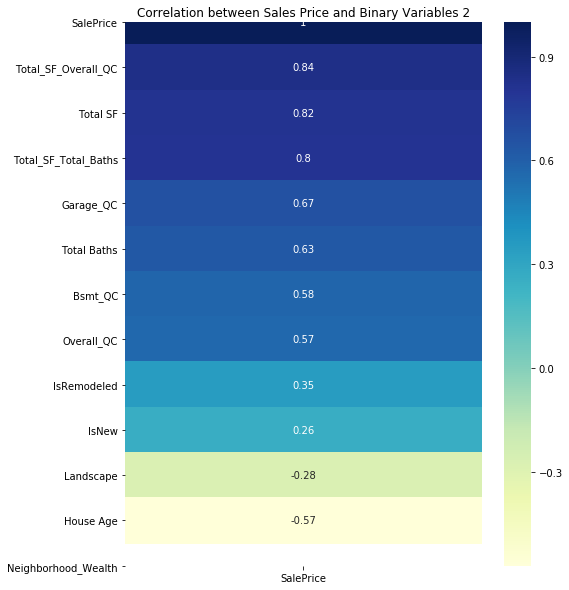

In [170]:
# heatmap for Sale Price vs scored variables correlation
fig, ax = plt.subplots(figsize = (8, 10))
sns.heatmap(train[train.columns[167:180]].join(train.SalePrice).corr()[['SalePrice']].sort_values('SalePrice', ascending=False), 
            annot=True, cmap='YlGnBu', ax=ax).set_title('Correlation between Sales Price and Binary Variables 2');

In [75]:
# extend interesting columns list with new findings

interesting_cols.extend(['Utilities','Exter Qual','Kitchen Qual','Functional', 
                         'Fireplace Qu', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 'Garage Qual', 'Pool QC'])

**More Feature Engineering**

In [76]:
print(interesting_cols)

['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd', 'Central Air_Y', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Neighborhood_OldTown', 'Exterior 1st_VinylSd', 'Paved Drive_Y', 'Sale Type_New', 'Electrical_SBrkr', 'Garage Type_BuiltIn', 'Exterior 2nd_CmentBd', 'Garage Type_Detchd', 'Garage Type_None', 'Sale Type_WD ', 'Exterior 2nd_Wd Sdng', 'Utilities', 'Exter Qual', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 'Garage Qual', 'Pool QC']


In [77]:
# Total Square Footage of house is the sum of all living areas
# add a new coulmn Total SF
train['Total SF'] = train['Gr Liv Area'] + train['Total Bsmt SF'] + train['1st Flr SF'] + train['2nd Flr SF']

In [78]:
# repeat for test
test['Total SF'] = test['Gr Liv Area'] + test['Total Bsmt SF'] + test['1st Flr SF'] + test['2nd Flr SF']

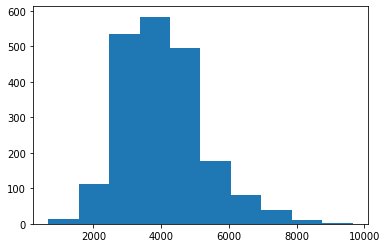

In [79]:
# check if new column's distribution
plt.hist(train['Total SF']);

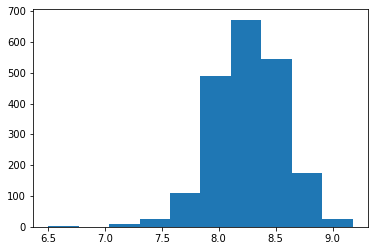

In [80]:
# As it is not normally distributed, we should also check log-transformed Total SF
plt.hist(np.log(train['Total SF']));

It looks more Gaussian now, so I will use log-transformed feature instead.

In [81]:
# train['Total SF'] = np.log(train['Total SF'])

In [82]:
# repeat for test
# test['Total SF'] = np.log(test['Total SF'])

We are dealing with sale price of the year the house was sold. The age of the house when it was sold would be a better indicator than the year built.

In [83]:
# create a new column for House Age to substitute Year Built variable
train['House Age'] = train['Yr Sold'] - train['Year Built']
interesting_cols.remove('Year Built')

In [84]:
# repeat for test
test['House Age'] = test['Yr Sold'] - test['Year Built']

Number of bathrooms is such a great predictor to make a house valuable. It is too much work and too costly to add new bathroom to a house as part of remodeling project. Earlier, we saw that Full Bath variable has good correlation so I will also add other bathrooms to make the feature more powerful.

In [85]:
train['Total Baths'] = train['Full Bath']+0.5*train['Half Bath']+0.5*train['Bsmt Half Bath'] +train['Bsmt Full Bath'] 

In [86]:
# repeat for test
test['Total Baths'] = test['Full Bath']+0.5*test['Half Bath']+0.5*test['Bsmt Half Bath']+test['Bsmt Full Bath'] 

Similar to cars and most types of merchandise (except antiques or good wine), a brand new house guarranties absence of any hidden wear and tears. Also, new constructions are more energy-efficient than older ones.

In [87]:
# create a binary variable if house was brand new when it was sold
train['IsNew'] = (train['Yr Sold']==train['Year Built']).astype(int)

In [88]:
# repeat for test
test['IsNew'] = (test['Yr Sold']==test['Year Built']).astype(int)

According to Year Remodeled vs Sale Price correlation, the houses remodeled just before they were sold have significantly higher prices in average. I will create another binary variable IsRemodeled for the houses remodeled within 5 year before the year sold.

In [89]:
# create a binary variable if house was recently remodeled when it was sold
train['IsRemodeled'] = (train['Yr Sold']==train['Year Remod/Add']).astype(int)

In [90]:
# repeat for test
test['IsRemodeled'] = (test['Yr Sold'] - test['Year Remod/Add'] <= 5).astype(int)

I will also rank neighborhoods based on correlation heatmap I generated earlier for dummy variables.

In [91]:
neighborhoods = [col for col in train.columns if 'Neighborhood' in col]

In [92]:
train[neighborhoods].join(train.SalePrice).corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
Neighborhood_NridgHt,0.448639
Neighborhood_NoRidge,0.263385
Neighborhood_StoneBr,0.256968
Neighborhood_Somerst,0.150056
Neighborhood_Timber,0.116385
Neighborhood_Veenker,0.083177
Neighborhood_CollgCr,0.082278
Neighborhood_Crawfor,0.058365
Neighborhood_ClearCr,0.052491


In [93]:
# define a function that creates Neighborhood_Wealth ranking column based on correlation weight
# 4 for correlation > 0.25
# 3 for correlation > 0.0
# 2 for correlation > -0.10
# 1 for correlation < -0.10
def neighborhood_wealth_ranking(data, neighborhoods_list):
    for col in neighborhoods_list:
        if data[col].corr(train['SalePrice']) > 0.25:
            for index, row in data.iterrows():
                if row[col] == 1:
                    data['Neighborhood_Wealth'] = 4
        elif data[col].corr(train['SalePrice']) > 0.0:
            for index, row in data.iterrows():
                if row[col] == 1:
                    data['Neighborhood_Wealth'] = 3
        elif data[col].corr(train['SalePrice']) > -0.10:
            for index, row in data.iterrows():
                if row[col] == 1:
                    data['Neighborhood_Wealth'] = 2
        else:
            for index, row in data.iterrows():
                if row[col] == 1:
                    data['Neighborhood_Wealth'] = 1  

In [94]:
# add Neighborhood_Wealth column to train dataset
neighborhood_wealth_ranking(train, neighborhoods)

In [95]:
# repeat for test
test['Neighborhood_GrnHill'] = 0 # add missing dummy 1 that have no observations in test
test['Neighborhood_Landmrk'] = 0 # add missing dummy 2 that have no observations in test
neighborhood_wealth_ranking(test, neighborhoods)

In [96]:
interesting_cols.extend(['Total SF','House Age','Total Baths','IsNew', 'IsRemodeled', 'Neighborhood_Wealth'])

Interaction Terms (Polynomial)

Lanscape is a very important feature that adds value to a house. It increases the living area in a property. Regular lot shape and flat land contour makes a house ladscapable.

  "A well-landscaped home has a significant price advantage over a home with no landscaping. This advantage ranges from 5.5 percent to 12.7 percent depending on the type of landscaping and the home's original value." 
(Cam Merritt, 2018, homeguides.sfgate.com)
https://homeguides.sfgate.com/landscaping-increase-property-value-7301.html

Similarly, quality and condition must be evaluated together to determine the value of a house. According to Jenifer Graham, (nationwide-appraisal.com, 2015) quality and condition rating is determined by numerous items, including the age of improvements, materials used, updates or upgrades, replacement of mechanical systems, and deferred maintenance.
https://nationwide-appraisal.com/what-determines-the-quality-condition-of-your-property/

In [97]:
# create interaction term for Lot Shape & Land Contour
train['Landscape'] = train['Lot Shape'] * train['Land Contour']
# create interaction term for garage quality & condition rating
train['Garage_QC'] = train['Garage Cond'] * train['Garage Qual'] * train['Garage Cars']
# create interaction term for basement quality & condition rating
train['Bsmt_QC'] = train['Bsmt Cond'] * train['Bsmt Qual']
# create interaction term for external quality & condition rating
train['Exter_QC'] = train['Exter Cond'] * train['Exter Qual']
# create interaction term for overall quality & condition rating
train['Overall_QC'] = train['Overall Cond'] * train['Overall Qual']

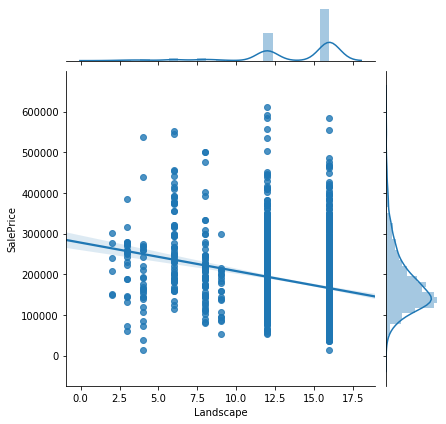

In [98]:
# Lanscape vs Sale Price
sns.jointplot(x=train['Landscape'], y=train['SalePrice'], kind='reg');

The correlation is not strong and unexpectedly negative. I will keep the feature as I belive it may be a good predictor for larger dataset based on myresearch on landscape impact on house value.

In [99]:
# repeat for test

# create interaction term for Lot Shape & Land Contour
test['Landscape'] = test['Lot Shape'] * test['Land Contour']
# create interaction term for garage quality & condition rating
test['Garage_QC'] = test['Garage Cond'] * test['Garage Qual']
# create interaction term for basement quality & condition rating
test['Bsmt_QC'] = test['Bsmt Cond'] * test['Bsmt Qual']
# create interaction term for external quality & condition rating
test['Exter_QC'] = test['Exter Cond'] * test['Exter Qual']
# create interaction term for overall quality & condition rating
test['Overall_QC'] = test['Overall Cond'] * test['Overall Qual']

In [100]:
# experimental interaction terms between top 4 features based on lasso coefficient magnitudes

train['Total_SF_Overall_QC'] = train['Total SF'] * train['Overall_QC']
train['Total_SF_Total_Baths'] = train['Total SF'] * train['Total Baths']
train['Total_SF_House_Age'] = train['Total SF'] * train['House Age']
train['Overall_QC_Total_Baths'] = train['Overall_QC'] * train['Total Baths']
train['Overall_QC_House_Age'] = train['Overall_QC'] * train['House Age']
train['Total_Baths_House_Age'] = train['Total Baths'] * train['House Age']
train['Overall_QC_Functional'] = train['Overall_QC'] * train['Functional']
train['Total SF_Functional'] = train['Total SF'] * train['Functional']
train['Total Baths_Functional'] = train['Total Baths'] * train['Functional']
train['House Age_Functional'] = train['House Age'] * train['Functional']


In [101]:
# repeat for test

test['Total_SF_Overall_QC'] = test['Total SF'] * test['Overall_QC']
test['Total_SF_Total_Baths'] = test['Total SF'] * test['Total Baths']
test['Total_SF_House_Age'] = test['Total SF'] * test['House Age']
test['Overall_QC_Total_Baths'] = test['Overall_QC'] * test['Total Baths']
test['Overall_QC_House_Age'] = test['Overall_QC'] * test['House Age']
test['Total_Baths_House_Age'] = test['Total Baths'] * test['House Age']
test['Overall_QC_Functional'] = test['Overall_QC'] * test['Functional']
test['Total SF_Functional'] = test['Total SF'] * test['Functional']
test['Total Baths_Functional'] = test['Total Baths'] * test['Functional']
test['House Age_Functional'] = test['House Age'] * test['Functional']

In [102]:
interesting_cols.extend(['Landscape','Garage_QC','Bsmt_QC','Exter_QC', 'Overall_QC'])

In [103]:
interesting_cols.extend(['Total_SF_Total_Baths',
                         'Overall_QC_Total_Baths', 'Overall_QC_House_Age', 'Total_Baths_House_Age', 
                         'Overall_QC_Functional', 'House Age_Functional', 'Total_SF_Overall_QC', 
                         'Total_SF_House_Age', 'Total SF_Functional', 'Total Baths_Functional'])


**Removing Outliers**

I've manually removed few outliers based on data visualization earlier for exceptionally small size but expensive houses. I will also use interquartile formula and compare my model before and after removing outliers.

In [104]:
# def remove_outlier(df_in, col):
#     q1 = df_in[col].quantile(0.25)
#     q3 = df_in[col].quantile(0.75)
#     IQR = q3-q1 #Interquartile range
#     lower_bound  = q1-1.5*IQR
#     upper_bound = q3+1.5*IQR
#     df_out = df_in.loc[(df_in[col] > lower_bound) & (df_in[col] < upper_bound)]
#     return df_out

# train = remove_outlier(train, 'SalePrice')

The above cell is commented because after removing outliers, model's R2 score significantly dropped and residuals distribution became less likely to be Gaussian. Outliers are actually helping the prediction accuracy.

**7) Modeling and Predictions**

**Baseline Prediction**

I will create my naive/baseline prediction model as the lowest threshold in terms of accuracy. Hopefully I chose the features wisely so far and my model will not be too overfit to go below the baseline.

In [105]:
# Create column called naive_preds which is the mean of Sale Price

naive_preds = np.mean(train['SalePrice'])

In [106]:
# calculate residuals of naive prediction

residuals = train['SalePrice'] - naive_preds

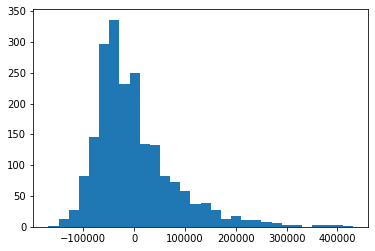

In [107]:
# distribution of residuals

plt.hist(residuals, bins=30);

Surprisingly normal-ish. Let's check the score.

In [108]:
# R2
# r2_score(train['SalePrice'], list(naive_preds))

In [109]:
# RMSE
# np.sqrt(mean_squared_error(train['SalePrice'], train['naive_preds']))

Filling predictions with mean value is not a good baseline for such a target that is systematically affected by various predictors. At least, we now know that there is a large number of useful features to be included in the model. I will attempt several models to come up with best approximate lenght for my features set.

**Simple Linear Regression (SLR)**

So far, I have selected 24 features that I am semi-confident with that have the best correlation, thereby the most power on Sales Price prediction. There is no doubt that my preferences are somewhat wrong, but how wrong are they? I will use multi-linear regression metrics to measure my errors and calculate accuracy of my first model thanks to sklearn.

In [110]:
len(interesting_cols)

55

In [111]:
print(interesting_cols)

['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd', 'Central Air_Y', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Neighborhood_OldTown', 'Exterior 1st_VinylSd', 'Paved Drive_Y', 'Sale Type_New', 'Electrical_SBrkr', 'Garage Type_BuiltIn', 'Exterior 2nd_CmentBd', 'Garage Type_Detchd', 'Garage Type_None', 'Sale Type_WD ', 'Exterior 2nd_Wd Sdng', 'Utilities', 'Exter Qual', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 'Garage Qual', 'Pool QC', 'Total SF', 'House Age', 'Total Baths', 'IsNew', 'IsRemodeled', 'Neighborhood_Wealth', 'Landscape', 'Garage_QC', 'Bsmt_QC', 'Exter_QC', 'Overall_QC', 'Total_SF_Total_Baths', 'Overall_QC_Total_Baths', 'Overall_QC_House_Age', 'Total_Baths_House_Age', 'Overall_QC_Functional', 'House Age_Functional', 'Total_SF_Overall_QC', 'Total_SF_House_Age', 'Total SF_Functional', 'Total Baths_Functional']


In [112]:
train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Central Air_Y,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Paved Drive_P,Paved Drive_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Total SF,House Age,Total Baths,IsNew,IsRemodeled,Neighborhood_Wealth,Landscape,Garage_QC,Bsmt_QC,Exter_QC,Overall_QC,Total_SF_Overall_QC,Total_SF_Total_Baths,Total_SF_House_Age,Overall_QC_Total_Baths,Overall_QC_House_Age,Total_Baths_House_Age,Overall_QC_Functional,Total SF_Functional,Total Baths_Functional,House Age_Functional
0,109,533352170,60,70.0,13517,None,3,4,4,CulDSac,Gtl,RRAe,1Fam,2Story,6,8,1976,2005,Gable,CompShg,BrkFace,289.0,4,3,4,4,No,GLQ,533.0,Unf,0.0,192.0,725.0,Ex,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,1,1976.0,RFn,2.0,475.0,4,4,0,44,0,0,0,0,1,None,None,0,3,2010,130500,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,3683.0,34,2.5,0,0,3,12,32.0,16,12,48,176784.0,9207.5,125222.0,120.0,1632,85.0,384,29464.0,20.0,272
1,544,531379050,60,43.0,11492,None,3,4,4,CulDSac,Gtl,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,BrkFace,132.0,4,3,5,4,No,GLQ,637.0,Unf,0.0,276.0,913.0,Ex,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,4,1997.0,RFn,2.0,559.0,4,4,0,74,0,0,0,0,1,None,None,0,4,2009,220000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,5157.0,13,3.5,0,0,3,12,32.0

In [113]:
# assign interesting columns to features list
features = interesting_cols

# set X and y
X = train[features]
y = train['SalePrice']

# define the linear regression model
slr = LinearRegression()

In [114]:
# fit the model
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
slr.coef_ # betas

array([ 3.21288146e+03,  1.78664027e+01,  2.97056998e+01,  1.27528404e+01,
        1.24808929e+01, -1.19137113e+04, -4.39434707e+01,  1.65667984e+01,
        8.69928654e+02,  8.06992933e+03,  1.48597605e+04,  2.83797440e+03,
        2.71301470e+04, -4.66564780e+03,  1.70719468e+03,  7.33299128e+03,
        4.64958091e+03, -6.37253346e+02, -1.63157706e+03,  3.68479822e+02,
       -4.29324696e+02,  1.69813168e+04,  4.61133901e+03,  5.53784054e+02,
        1.83850901e+04,  7.01927672e+03,  8.19033641e+03,  8.31313275e+03,
        2.36853380e+03,  2.57110641e+03,  7.23712767e+01, -1.10779999e+04,
        2.56019417e+03,  3.19024471e+03, -1.99914204e+01,  1.43206935e+03,
        1.33948569e+04, -3.74068795e+02,  1.87106635e+04, -1.88683771e-08,
       -1.13984414e+03, -3.29753884e+01,  2.03618620e+03, -8.32834252e+01,
       -1.06350999e+03,  3.46863354e+00, -1.24550903e+02, -3.11744643e+00,
       -9.05233880e+01, -5.56358765e+00, -8.97991679e+01,  6.70690213e-01,
       -1.55124209e-01,  

In [116]:
slr.intercept_ # beta 0

-65811.4439779963

In [117]:
# create a dictionary for feature, absolute value of coefficient pairs
coef_dict = {}
for f, coef in zip(features, slr.coef_):
    coef_dict[f] = np.abs(coef)

In [118]:
# convert the coef dictionary to dataframe
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Feature', 'Coefficient'])

In [119]:
# plot the coefficients
# plt.subplots(figsize=(16, 12))
# sns.barplot(x="Coefficient", y="Feature", data=coef_df.sort_values('Coefficient', ascending=False),
#             label="Total", color='#69547C').set_title('SLR Coefficients per Feature');

The coefficients of features do not seem to be aligned with their correlations with target. The lowest coefficients are the first ones to be dropped to simplify the model - if necessary. However, the data has not been scaled yet and there are a variety of units that are not proportional (apples and oranges). Low coefficient does not always mean low impact as long as the model is derived from simple Linear Regression.

In [120]:
# R2 score of the model
slr.score(X, y)

0.9155605697277772

In [121]:
train['Predictions'] = slr.predict(X)

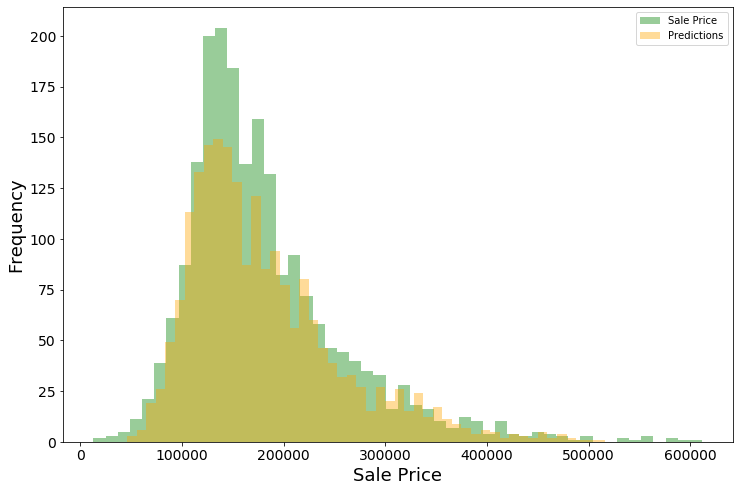

In [122]:
# Sale Price (y) and Predictions (yhat) distribution 
fig, ax = plt.subplots(figsize = (12, 8))
sns.distplot(train['SalePrice'], color='green', kde=False, bins=50, label='Sale Price')
sns.distplot(train['Predictions'], color='orange', kde=False, bins=50, label='Predictions')
plt.xlabel('Sale Price', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Frequency', fontsize=18)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');

In [123]:
# create a secondary slr for log transformed model of the target
slr_log = LinearRegression()

y_log = train['SalePrice'].apply(np.log)

In [124]:
# fit the log model
slr_log.fit(X, y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
# R2 score of log model
slr_log.score(X, y_log)

0.901489294368595

In [126]:
slr_log.predict(X)

array([12.05972235, 12.37780675, 11.83003851, ..., 11.96180696,
       11.78719389, 12.16836883])

The score increased by ≈0.01 thanks to log transformation which reduced the influence of outliers. I will apply the same method to my further attempts.

**Kaggle Submission (SLR)**

The goal is to predict the sales price for each house as accurately as possible and submit in .csv file format.  

The file should contain a header and have the following format: **Id, SalePrice**

In [127]:
X_test = test[features]
test['SalePrice'] = slr.predict(X_test)

In [128]:
# create features list identical with train for test dataset
X_test = test[features]

# preds = slr.predict(X_test)

# log transformed predictions
# we can't use this, LOG is not a valid currency
preds_log = slr_log.predict(X_test)

# exponentiate log transformed predictions (reverse engineering in action!)
preds = np.exp(slr_log.predict(X_test))

In [129]:
# fill the SalePrice column with the model's predictions
test['SalePrice'] = preds

In [130]:
# generate and save the submission file
# test[['Id', 'SalePrice']].to_csv('./datasets/preds_slr.csv', index=False)

**Cross Validate SLR**

Train Test Split

In [131]:
# set X and y
X = train[features]
y = train['SalePrice']

In [132]:
# split
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42)

In [133]:
X_test = test[features]

Instantiate and Fit

In [134]:
lr = LinearRegression()

lr.fit(X_train, np.log(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
lr.score(X_train, np.log(y_train))

0.9068303438117743

In [136]:
lr.score(X_holdout, np.log(y_holdout))

0.8806532363048442

In [137]:
cross_val_score(lr, X_train, np.log(y_train), cv=10).mean()

0.8942396993808359

Predict

In [138]:
# fill Sale Price column with predicted values
test['SalePrice'] = np.exp(lr.predict(X_test))
test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Central Air_Y,Heating_GasA,Heating_GasW,Heating_Grav,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Paved Drive_P,Paved Drive_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Total SF,House Age,Total Baths,IsNew,IsRemodeled,Neighborhood_GrnHill,Neighborhood_Landmrk,Neighborhood_Wealth,Landscape,Garage_QC,Bsmt_QC,Exter_QC,Overall_QC,Total_SF_Overall_QC,Total_SF_Total_Baths,Total_SF_House_Age,Overall_QC_Total_Baths,Overall_QC_House_Age,Total_Baths_House_Age,Overall_QC_Functional,Total SF_Functional,Total Baths_Functional,House Age_Functional,SalePrice
0,2658,902301120,190,69.0,9142,Grvl,4,4,4,Inside,Gtl,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,None,0.0,3,2,3,4,No,Unf,0,Unf,0,1020,1020,Gd,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,1,1910.0,Unf,1,440,2,2,0,60,112,0,0,0,1,None,None,0,4,2006,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,4876,96,2.0,0,0,0,0,2,16,4,12,6,48,234048,9752.0,468096,96.0,4608,192.0,384,39008,16,768,122053.821956
1,2718,905108090,90,75.0,9662,None,3,4,4,Inside,Gtl,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,None,0.0,3,3,5,4,No,Unf,0,Unf,0,1967,1967,TA,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,1,1977.0,Fin,2,580,4,4,170,0,0,0,0,0,1,None,None,0,8,2006,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,5901,29,2.0,0,0,0,0,2,12,16,20,9,20,118020,11802.0,171129,40.0,580,58.0,160,47208,16,232,195596.583033
2,2414,528218130,60,58.0,17104,None,3,4,4,Inside,Gtl,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,None,0.0,4,3,5,5,Av,GLQ,554

**Kaggle Submission (CV)**

In [139]:
# generate and save the submission file
# test[['Id', 'SalePrice']].to_csv('./datasets/preds_slr_cv.csv', index=False)

**Standard Scaler**

We will define predictor and target and then standardize the predictors. This is important because we are comparing data that correspond to different units (sqft vs USD, age vs USD, quality ranking vs USD etc.). Standardization/Normalization will help to transform the mean to zero for all variable distributions and make the variance unitary. Then we can get a better insight of coefficient weights and decide which features to remove from the prediction.

In [140]:
# instantiate the standard scaler and setting it equal to ss
ss = StandardScaler()
# set X, y
X = train[features]
y = np.log(train['SalePrice'])

In [141]:
# split the data into train and holdout
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, random_state=42)

In [142]:
# scale train and holdout X variables
X_train_scaled = ss.fit_transform(X_train)
X_holdout_scaled = ss.transform(X_holdout)

Build a linear regression predicting Sale Price from the selected features. Then, cross-validate the  𝑅2  of an ordinary linear regression model with 10 cross-validation folds.

In [143]:
# instantiate linear regression model
lr = LinearRegression()
# fit scaled data and target variable
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
# scaled data R2
lr.score(X_train_scaled, y_train)

0.9068303438117743

In [145]:
# scaled holdout data R2
lr.score(X_holdout_scaled, y_holdout)

0.8806532363051086

In [146]:
# cross-validate 10 folds of train data
cross_val_score(lr, X_train_scaled, y_train, cv=10)

array([0.9155664 , 0.90264932, 0.87433924, 0.90523074, 0.83682039,
       0.89943313, 0.89303576, 0.91977987, 0.90633957, 0.88920257])

The cross-validate score for 10 folds show that the model is slightly overfit. I will use Ridge and Lasso regressions to detect the noise in my features.

**Ridge Regression CV**

So far, I engineered and included some features that I am confident about their relevance, however some of them seem to be creating unnecessary noise. I would like to rely on some solid algorithm rather than my yet poor judgement. Ridge Regression helps minimizing the impact of irrelevant features by lowering their coefficient values. Since we are passing our scaled data to the regression model, features will have more proportional influence on our model and predictions. It's like whole world use the metric system so no need to mention units.

Find an optimal value for the ridge regression alpha.

In [147]:
# find an optimal value for the ridge regression alpha

ridge_alphas = np.logspace(1, 2, 1000)

ridge = RidgeCV(alphas = ridge_alphas, cv = 5)

ridge.fit(X_train_scaled, y_train)
print(ridge.alpha_)

10.0


In [148]:
ridge.score(X_train_scaled, y_train)

0.9058782322295078

In [149]:
ridge.score(X_holdout_scaled, y_holdout)

0.8795455480374198

In [150]:
# cross-validate the ridge regression R2 with the optimal alpha
ridge_opt = Ridge(alpha=ridge.alpha_)

cross_val_score(ridge_opt, X_train_scaled, y_train, cv=5).mean()

0.8969240884317713

**Kaggle Submission (Ridge)**

In [151]:
#scale the Kaggle test data
X_test = test[features]
X_test_scaled = ss.transform(X_test)

In [152]:
# generate predictions from Ridge model for Kaggle test data set
ridge_preds = np.exp(ridge.predict(X_test_scaled))

In [153]:
# fill Sale Price column with predicted values
test['SalePrice'] = ridge_preds

In [154]:
test['SalePrice'].head()

0    122809.957412
1    192894.134446
2    214039.028800
3    104491.855473
4    180026.181043
Name: SalePrice, dtype: float64

In [155]:
# generate and save the submission file
# test[['Id', 'SalePrice']].to_csv('./datasets/preds_ridge.csv', index=False)

The Kaggle score tells that my Ridge model is not more accurate than my Multi-Linear Regression model. I will also try Lasso algorithm to take a close look at the coefficients.

**Lasso Regression**

In [156]:
# lasso_alphas = np.linspace(0.0001, 1, 200)

In [157]:
lasso = LassoCV(n_alphas=1000, cv=5)

lasso.fit(X_train_scaled, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=1000, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [158]:
lasso.alpha_

0.0003391417607020338

In [159]:
lasso.score(X_train_scaled, y_train)

0.9060381312436702

In [160]:
lasso.score(X_holdout_scaled, y_holdout)

0.8794483606110063

In [161]:
lasso_coef_dict = dict(zip(X.columns, np.abs(lasso.coef_)))

In [162]:
lasso_coef_df = pd.DataFrame(lasso_coef_dict.items(), columns=['feature', 'coef'])
# lasso_coef_df.sort_values('coef', ascending=False)

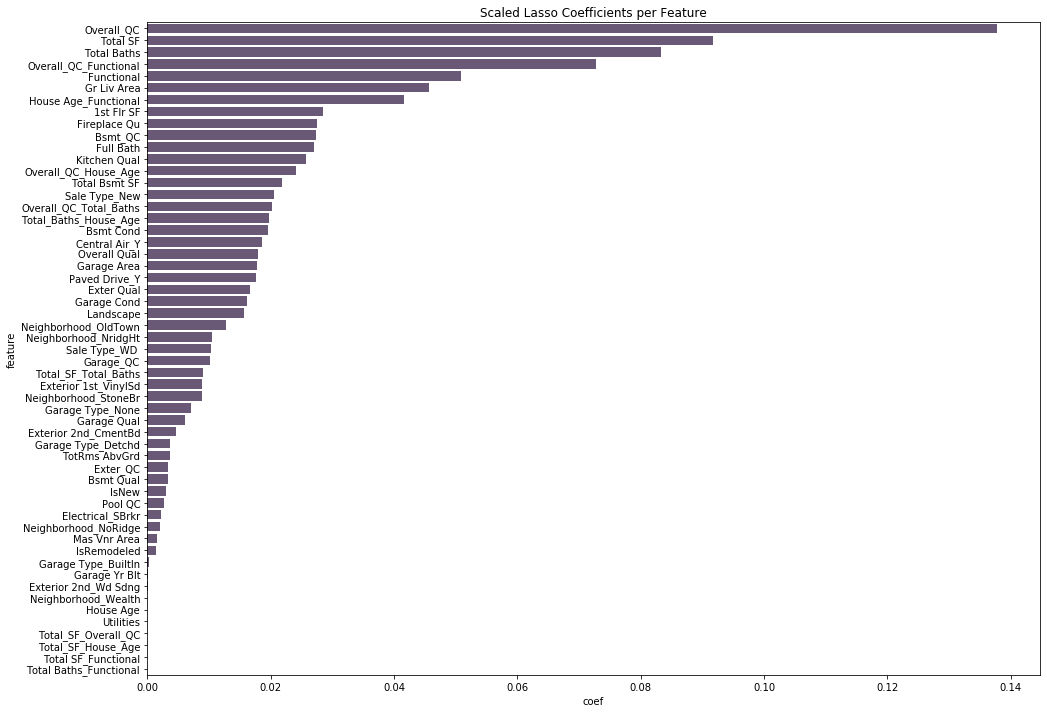

In [163]:
# plot the scaled lasso coefficients
plt.subplots(figsize=(16, 12))
sns.barplot(x="coef", y="feature", data=lasso_coef_df.sort_values('coef', ascending=False),
            label="Total", color='#69547C').set_title('Scaled Lasso Coefficients per Feature');

In [164]:
lasso_opt = Lasso(alpha = lasso.alpha_)

cross_val_score(lasso_opt, X_train_scaled, y_train).mean()

0.8948858911432819

In [165]:
# the features zeroed out by lasso regression
# needs to be dropped before using linear regression in order to avoid overfitting
lasso_coef_df[lasso_coef_df['coef'] < 0.001].sort_values('coef')

,feature,coef
24,Utilities,0.000000
35,House Age,0.000000
39,Neighborhood_Wealth,0.000000
51,Total_SF_Overall_QC,0.000000
52,Total_SF_House_Age,0.000000
53,Total SF_Functional,0.000000
54,Total Baths_Functional,0.000000
23,Exterior 2nd_Wd Sdng,0.000067
6,Garage Yr Blt,0.000177
18,Garage Type_BuiltIn,0.000292


**Kaggle Submission (Lasso)**

In [166]:
#scale the Kaggle test data
X_test = test[features]
X_test_scaled = ss.transform(X_test)

In [167]:
# generate lasso predictions
lasso_preds = np.exp(lasso.predict(X_test_scaled))

In [168]:
test['SalePrice'] = lasso_preds

In [169]:
# generate and save the submission file
# test[['Id', 'SalePrice']].to_csv('./datasets/preds_lasso.csv', index=False)